# HW3: Alzheimers
Predict if a person has alzhemier or not (there are 4 categories).

### Import train and test dataset

In [1]:
train_dir = r"C:\Users\tzhy3\OneDrive\Documents\GitHub\AI-in-Accounting-and-Finance\HW3\Alzheimer_s Dataset\train"
test_dir = r"C:\Users\tzhy3\OneDrive\Documents\GitHub\AI-in-Accounting-and-Finance\HW3\Alzheimer_s Dataset\test"

### Initialise

In [2]:
b=5

## Keras

### Build Convolutional Neural Network

In [3]:
import random
random.seed(1)

import numpy as np
np.random.seed(1)

from tensorflow import random
random.set_seed(1)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
g = ImageDataGenerator()

In [6]:
train_data = g.flow_from_directory(train_dir,(150,150),batch_size=b,shuffle=False)

Found 5121 images belonging to 4 classes.


In [7]:
test_data = g.flow_from_directory(test_dir,(150,150),batch_size=b,shuffle=False)

Found 1279 images belonging to 4 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(150,150,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(4,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

### Machine Learning

In [10]:
import pandas as pd
accuracy_df = pd.DataFrame({})

In [11]:
h = model.fit(train_data, batch_size=b, epochs=10)

Epoch 1/10
1025/1025 [==============================] - 35s 33ms/step - loss: 2.3435 - accuracy: 0.4757
Epoch 2/10
1025/1025 [==============================] - 34s 33ms/step - loss: 1.0463 - accuracy: 0.4987
Epoch 3/10
1025/1025 [==============================] - 35s 34ms/step - loss: 1.0450 - accuracy: 0.4968
Epoch 4/10
1025/1025 [==============================] - 34s 33ms/step - loss: 0.9960 - accuracy: 0.5208
Epoch 5/10
1025/1025 [==============================] - 35s 34ms/step - loss: 0.9433 - accuracy: 0.5444
Epoch 6/10
1025/1025 [==============================] - 35s 34ms/step - loss: 0.9583 - accuracy: 0.5253
Epoch 7/10
1025/1025 [==============================] - 34s 34ms/step - loss: 0.8801 - accuracy: 0.5731
Epoch 8/10
1025/1025 [==============================] - 33s 32ms/step - loss: 0.8546 - accuracy: 0.5831
Epoch 9/10
1025/1025 [==============================] - 37s 36ms/step - loss: 0.8393 - accuracy: 0.5917
Epoch 10/10
1025/1025 [==============================] - 37s 36m

In [12]:
import matplotlib.pyplot as plt

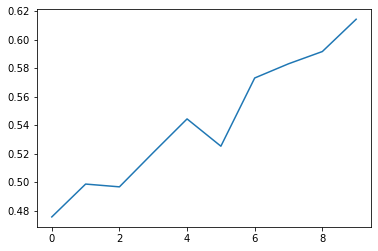

In [13]:
plt.plot(h.history["accuracy"])

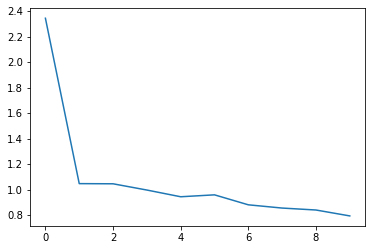

In [14]:
plt.plot(h.history["loss"])

In [15]:
pred = model.predict(test_data)

256/256 [==============================] - 2s 8ms/step


In [16]:
import numpy as np

In [17]:
pred = np.argmax(pred,axis=1)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(test_data.classes, pred)

In [20]:
cm

array([[  2,   0,  65, 112],
       [  0,   0,   2,  10],
       [  0,   0, 458, 182],
       [  0,   0, 207, 241]], dtype=int64)

In [21]:
import seaborn as sns

<AxesSubplot:>

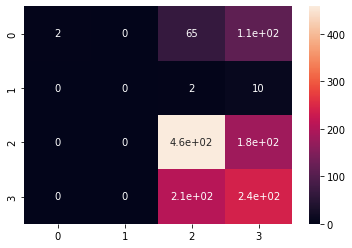

In [22]:
sns.heatmap(cm, annot=True)

In [23]:
accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(sum(sum(cm)))
accuracy_df.insert(0, 'Keras (Default)', [accuracy])
print("Accuracy is:", accuracy)

Accuracy is: 0.5480844409695075


## Changing parameter setting

### Build Convolutional Neural Network

In [24]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(150,150,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(4,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

### Machine Learning

In [25]:
h = model.fit(train_data, batch_size=b, epochs=10)

Epoch 1/10
1025/1025 [==============================] - 35s 33ms/step - loss: 2.2474 - accuracy: 0.4608
Epoch 2/10
1025/1025 [==============================] - 33s 32ms/step - loss: 1.1194 - accuracy: 0.4866
Epoch 3/10
1025/1025 [==============================] - 31s 30ms/step - loss: 1.0662 - accuracy: 0.4917
Epoch 4/10
1025/1025 [==============================] - 33s 33ms/step - loss: 1.0679 - accuracy: 0.4950
Epoch 5/10
1025/1025 [==============================] - 34s 33ms/step - loss: 1.0409 - accuracy: 0.4952
Epoch 6/10
1025/1025 [==============================] - 32s 32ms/step - loss: 1.0411 - accuracy: 0.4921
Epoch 7/10
1025/1025 [==============================] - 33s 32ms/step - loss: 1.0090 - accuracy: 0.5083
Epoch 8/10
1025/1025 [==============================] - 35s 34ms/step - loss: 0.9940 - accuracy: 0.5192
Epoch 9/10
1025/1025 [==============================] - 35s 34ms/step - loss: 0.9299 - accuracy: 0.5556
Epoch 10/10
1025/1025 [==============================] - 34s 33m

In [26]:
import matplotlib.pyplot as plt

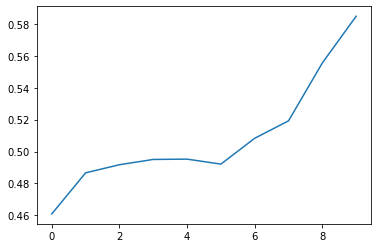

In [27]:
plt.plot(h.history["accuracy"])

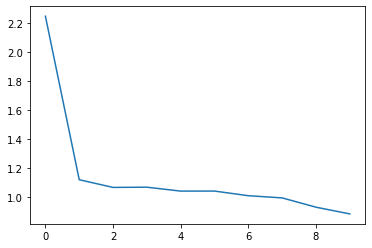

In [28]:
plt.plot(h.history["loss"])

In [29]:
pred = model.predict(test_data)

256/256 [==============================] - 2s 6ms/step


In [30]:
import numpy as np

In [31]:
pred = np.argmax(pred,axis=1)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(test_data.classes, pred)
cm

array([[  3,   0, 113,  63],
       [  0,   0,  11,   1],
       [  1,   0, 567,  72],
       [  0,   0, 313, 135]], dtype=int64)

In [34]:
accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(sum(sum(cm)))
accuracy_df.insert(1, 'Keras (Changed Parameters)', [accuracy])
print("Accuracy is:", accuracy)

Accuracy is: 0.5512118842845973


In [35]:
import seaborn as sns

<AxesSubplot:>

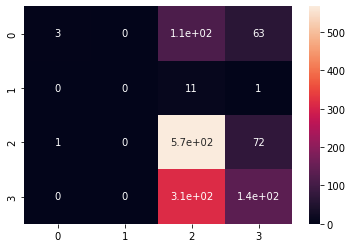

In [36]:
sns.heatmap(cm, annot=True)

### Pros and Cons of Keras
#### Pros
Keras is a user-friendly API and it is very easy to create neural network models with Keras. It is good for implementing deep learning algorithms and natural language processing. We can build a neural network model in just a few lines of code.
#### Cons
Keras is slow in executing and training deep learning models. It has a complex architecture.

### How to overcome weakness (improve accuracy in this case)
1. Get more data
2. Feature Selection
3. Explore different parameters

## ResNET

In [37]:
import cv2
import numpy as np
import os

In [38]:
from keras.applications import ResNet50

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
from tensorflow.keras.applications import resnet50

In [41]:
model = ResNet50(weights="imagenet",include_top=False,input_shape=(150,150,3))

In [42]:
Y_train = []
X_train = []

In [43]:
label = 0

In [44]:
for i in os.listdir(train_dir):
    path = train_dir + "/" + i + "/"
    for j in os.listdir(path):
        img = cv2.imread(path+j)
        img = cv2.resize(img,(150,150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
        img = model.predict(img)
        X_train.append(img.flatten()/255)
        Y_train.append(label)
    label = label+1

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 99ms/step


In [45]:
Y_test=[]
X_test=[]
label=0
for i in os.listdir(train_dir):
    path = test_dir + "/" + i + "/"
    for j in os.listdir(path):
        img = cv2.imread(path+j)
        img = cv2.resize(img,(150,150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis=0))
        img = model.predict(img)
        X_test.append(img.flatten()/255)
        Y_test.append(label)
    label = label+1

1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 114ms/step


### Logistic Regression

In [46]:
from sklearn import linear_model
model = linear_model.LogisticRegression(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,pred)
accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(sum(sum(cm)))
accuracy_df.insert(2, 'ResNET (Logistic Regression)', [accuracy])
print("Accuracy for logistic regression:", accuracy)

C:\Users\tzhy3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for logistic regression: 0.6270523846755277


<AxesSubplot:>

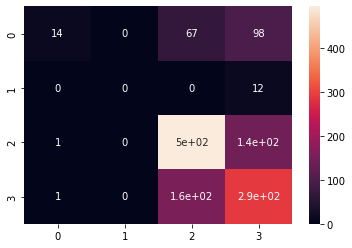

In [47]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Decision Tree

In [48]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(sum(sum(cm)))
accuracy_df.insert(3, 'ResNET (Decision Tree)', [accuracy])
print("Accuracy for decision tree:", accuracy)

Accuracy for decision tree: 0.4831899921813917


<AxesSubplot:>

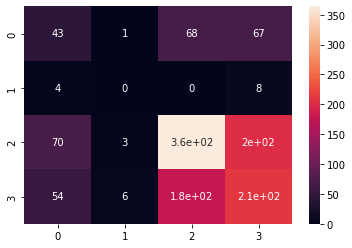

In [49]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Random Forest

In [50]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3])/(sum(sum(cm)))
accuracy_df.insert(4, 'ResNET (Random Forest)', [accuracy])
print("Accuracy for random forest:", accuracy)

Accuracy for random forest: 0.6215793588741204


<AxesSubplot:>

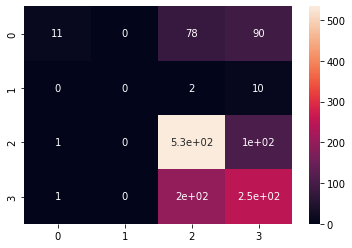

In [51]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Pros and Cons of ResNet
#### Pros
The ResNet architecture does not need to fire all neurons in every epoch. This greatly reduces the training time and improves accuracy. Once a feature is learnt, it does not try to learn it again but rather focuses on learning newer features. A very smart approach that greatly improved model training performance.
#### Cons
1. Increased complexity of architecture
2. Implementation of Batch normalization layers since ResNet heavily depends on it
3. Adding skip level connections for which you have take into account the dimensionality between the different layers which can become a headache

### How to overcome the weakness
1. Add another dense layer before the Dense layer
2. Train ResNet from scratch
3. Use Heavier Data Augmentation
4. Experiment with different learning rates

## VGGNet (Orange)

In [53]:
accuracy_df.insert(5, 'VGGNet (Logistic Regression)', 0.613)
accuracy_df.insert(6, 'VGGNet (Tree)', 0.471)
accuracy_df.insert(7, 'VGGNet (Random Forest)', 0.528)
accuracy_df.insert(8, 'VGGNet (Gradient Boosting)', 0.582)
accuracy_df.insert(9, 'VGGNet (Neural Network)', 0.675)

### Pros and Cons of VGGNet (Orange)
VGG had introduced the concept of increasing layers for better accuracy, however it was found that when we increase the number of layers beyond 20, the model is not able to converge to the minimum error %. A major reason for this is the vanishing gradient problem. learning rate becomes so less that there are no changes being introduced into the weights of the model.
One major disadvantage was that this model experiences the vanishing gradient problem.
### How to overcome the weakness
Using ResNet

### Comparing accuracy

In [54]:
accuracy_df

,Keras (Default),Keras (Changed Parameters),ResNET (Logistic Regression),ResNET (Decision Tree),ResNET (Random Forest),VGGNet (Logistic Regression),VGGNet (Tree),VGGNet (Random Forest),VGGNet (Gradient Boosting),VGGNet (Neural Network)
0,0.548084,0.551212,0.627052,0.48319,0.621579,0.613,0.471,0.528,0.582,0.675


#### Comparing Machine Learning Models
Logistic regression performed the best out of the three machine learning models for ResNet with the highest accuracy of 0.627 while decision tree performed the worst with the lowest accuracy of 0.483. (Gradient boosting and neural network took too long to run for ResNet so I did not run them.) For VGGNet, neural netowrk performed the best with the highest accuracy of 0.675 while decision tree performed the worst with the lowest accuracy os 0.471.

#### Comparing between Keras, ResNet, and VGGNet
Looking at just logistic regression to keep it fair, ResNet performed the best with the highest accuracy of 0.622, just slightly higher than VGGNet with an accuracy of 0.613, while Keras with the default paramters performed the worst with the lowest accuracy of 0.548084

### Importance of model to the hospital

The model can enable the doctors (or any medical personnel even without the medical knowledge) to input an image of the brain scan to perform a quick check of what category it falls under. Since there are four categories, the advice the doctors give to the patient can vary depending on the category. However, the model just provides a fast solution, the doctor still need to look at the brain scan in depth.